In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.pipeline import Pipeline, make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import TechBookFunctions as tb

# How to Increase Average Life Expectancy #
We will be using the County Health Status Indicators dataset from the CDC to identify features in the data that most affect average life expectancy. The first step in our process is to import and clean the data. The details of the importing and cleaning the data are located in the data_import.py and data_clean.py files.

In [2]:
#this function also outputs the shapes of the resulting arrays to make sure everything is as expected
X_train, X_test, y_train, y_test, full_X, full_y  = tb.import_and_clean()



2485 2485
623 623


NameError: name 'X_train' is not defined

Now that we have the fully cleaned data, we use sklearn's pipline system to perform parameter selection

## The Model ##
We chose to scale our features with the sklearn StandardScalar because we needed to standardize the units of our features, but we did not want to lose the interpretability of our regression coefficients. Using sklearn's pipeline object allows us to make sure that there is no data leakage from the scaling process during our cross validation. We decided to use the Elastic Net as our regression model because we wanted to perform feature selection but we also knew that there was some colinearity between our features.

In [3]:
# First we create a Pipeline object containing the Scaler we are using to standardize our data, and the regression model we are using
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('elastic', ElasticNet(max_iter=10000))
])

# We then create lists of parameter values to try in the model
params = {
    # this list of parametes was chosen by trial and error
    'elastic__alpha': [.001, .025, .05, .1, .4, .5, .6, .75, 1, 2, 5, 10],
    # this list of parameters is a modified list of suggested parameters from sklearn
    'elastic__l1_ratio': [.01,.05,.1,.25, .5, .6, .7,  .9, .95, .99, 1]
}

# Here we pass our pipline and params list into a GridSearch object. Grid search takes all possible combinations of parameters in the
# params dictionary and performs cross-fold validation for each combination.
search = GridSearchCV(estimator=pipe,
                      param_grid=params,
                      cv=5,  # this is the number of folds to use in the cross validation
                      return_train_score=True
                      )

# Finally we fit our full model to the training data
search.fit(X_train, y_train);


Below we have a chart with the 5 best performing combinations of parameters from our model selecting process. This chart also includes the mean testing and training training scores (correlation coefficients) for the models.

In [5]:
tb.model_selection_results(search)

,rank_test_score,param_elastic__alpha,param_elastic__l1_ratio,mean_test_score,mean_train_score
14,1,0.025,0.25,0.688176,0.696286
23,2,0.05,0.05,0.688151,0.695997
24,3,0.05,0.1,0.688146,0.695807
13,4,0.025,0.1,0.688086,0.696517
12,5,0.025,0.05,0.688061,0.696571


Now that we have selected the best parameters for our model, we fit a model with those parameters so we can look at the individual feature coefficients.
Here are the regression coefficients as a bar plot, with a table of the values afterward.

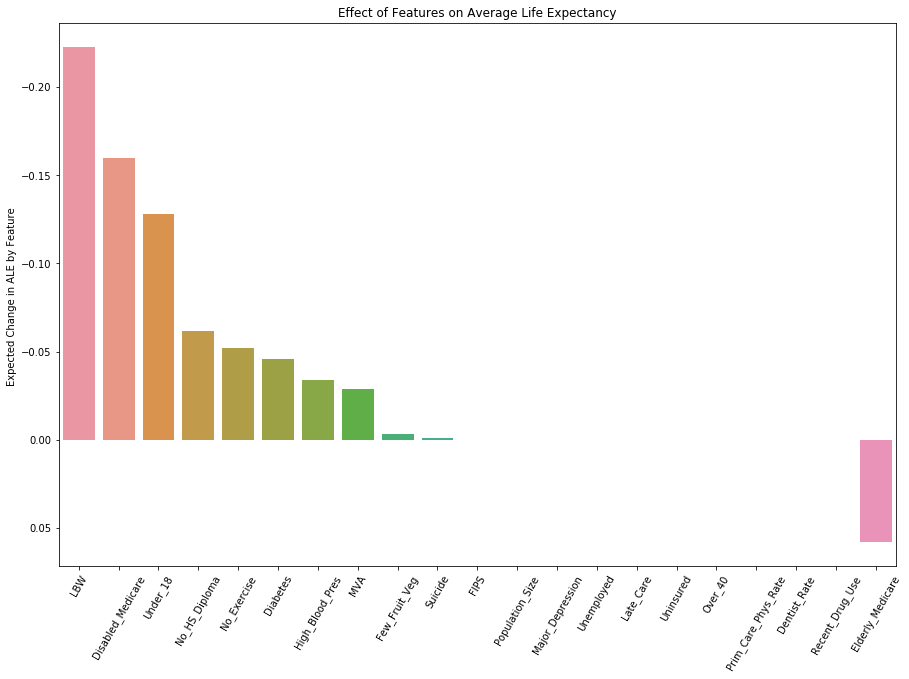

In [6]:
coefficients_table=tb.run_model(X_train, y_train, l1_ratio=.025, alpha=.25)


In [8]:
coefficients_table

,0,1
1,LBW,-0.222323
17,Disabled_Medicare,-0.159945
2,Under_18,-0.127671
7,No_HS_Diploma,-0.0615167
11,No_Exercise,-0.0520597
14,Diabetes,-0.0456965
13,High_Blood_Pres,-0.0336874
5,MVA,-0.0285445
12,Few_Fruit_Veg,-0.00307042
6,Suicide,-0.000773262
